   # Consultas da Ana

Bibliotecas necessárias:

In [1]:
import pymysql
import pandas as pd
from time import time
import numpy as np
import matplotlib.pyplot as plt

Conexão com o banco:

In [3]:
conn = pymysql.connect(      host='localhost',
                             user='root',
                             password='meudeusdoceu',
                             db='TPFinal',
                             #charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()

### Funções de comparação:

In [4]:

# Mede a média dos tempos de execução
def crono(cmd, conn, niter=500):
    total = []
    for i in range(niter):    
        inicio = time()
        df = pd.read_sql_query(cmd, conn)
        total.append(time() - inicio)
    return total

# Compara dois tempos de execução
def cmp(t1, t2):
    t1, t2 = np.mean(t1), np.mean(t2)
    print()
    if t1 < t2:
        print("t1 foi, em média, {}% mais rápido do que t2".format(round((1 - t1/t2)*100, 2)))
    else:
        print("t2 foi, em média, {}% mais rápido do que t1".format(round((1 - t2/t1)*100, 2)))

# Mostra o histograma dos dois tempos
def hist(t1, t2):
    plt.hist(t1, bins=50, alpha=0.5, label='t1')
    plt.hist(t2, bins=50, alpha=0.5, label='t2')
    plt.legend(loc='upper right')
    plt.title("Comparação dos tempos de consulta")
    plt.show()

### Função de agregação sobre o resultado da junção de pelo menos duas relações

Método 1:

In [5]:
cmd1 = """
    select parts.name, sum(quantity) as quantidade
    from inventory_parts join parts on inventory_parts.part_num = parts.part_num
    group by parts.part_num 
    order by quantidade desc
"""
df1 = pd.read_sql_query(cmd1, conn)
df1.head(10)

,name,quantidade
0,Brick 1 x 2,69250.0
1,Plate 1 x 2,58777.0
2,Plate Round 1 x 1 with Solid Stud,53535.0
3,Brick 2 x 2,48543.0
4,Brick 1 x 1,46973.0
5,Plate 1 x 1,42035.0
6,Technic Pin with Friction Ridges Lengthwise an...,40438.0
7,Brick 1 x 4,29788.0
8,Brick 2 x 4,28951.0
9,Plate 1 x 4,28789.0


Método 2:

In [7]:
cmd2 = """
    select parts.name, sum(quantity) as quantidade
    from inventory_parts, parts
    where inventory_parts.part_num = parts.part_num
    group by parts.part_num 
    order by quantidade desc
"""
df1 = pd.read_sql_query(cmd2, conn)
df1.head(10)

,name,quantidade
0,Brick 1 x 2,69250.0
1,Plate 1 x 2,58777.0
2,Plate Round 1 x 1 with Solid Stud,53535.0
3,Brick 2 x 2,48543.0
4,Brick 1 x 1,46973.0
5,Plate 1 x 1,42035.0
6,Technic Pin with Friction Ridges Lengthwise an...,40438.0
7,Brick 1 x 4,29788.0
8,Brick 2 x 4,28951.0
9,Plate 1 x 4,28789.0


Comparação:


t1 foi, em média, 0.25% mais rápido do que t2


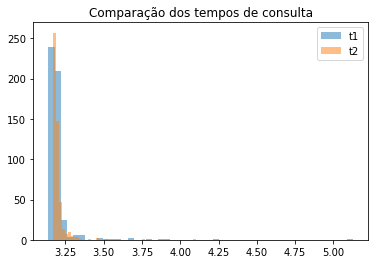

In [10]:
t1 = crono(cmd1, conn)
t2 = crono(cmd2, conn)

cmp(t1, t2)
hist(t1, t2)

### Junção de três ou mais relações

### Consulta 1

Método 1:

In [5]:
cmd1 = """
select inventory_parts.inventory_id as inventario, part_categories.name as categoria, sum(inventory_parts.quantity) as quantidade
    from parts join part_categories on part_categories.id = parts.part_cat_id
    join inventory_parts on inventory_parts.part_num = parts.part_num
    group by inventory_parts.inventory_id, part_categories.id
    order by inventory_parts.inventory_id
"""
df1 = pd.read_sql_query(cmd1, conn)
df1.head(10)

,inventario,categoria,quantidade
0,1,Minifigs,1.0
1,1,Minifig Accessories,3.0
2,3,Bricks Sloped,1.0
3,3,Bricks,1.0
4,3,Minifigs,4.0
5,3,Plates,5.0
6,3,Tiles,8.0
7,3,Bricks Round and Cones,6.0
8,3,Plates Round and Dishes,11.0
9,3,Panels,3.0


Método 2:

In [6]:
cmd2 = """
select inventory_parts.inventory_id as inventario, part_categories.name as categoria, sum(inventory_parts.quantity) as quantidade
    from parts, part_categories, inventory_parts
    where part_categories.id = parts.part_cat_id and inventory_parts.part_num = parts.part_num
    group by inventory_parts.inventory_id, part_categories.id
    order by inventory_parts.inventory_id
"""
df1 = pd.read_sql_query(cmd2, conn)
df1.head(10)

,inventario,categoria,quantidade
0,1,Minifigs,1.0
1,1,Minifig Accessories,3.0
2,3,Bricks Sloped,1.0
3,3,Bricks,1.0
4,3,Minifigs,4.0
5,3,Plates,5.0
6,3,Tiles,8.0
7,3,Bricks Round and Cones,6.0
8,3,Plates Round and Dishes,11.0
9,3,Panels,3.0


Comparação:


t1 foi, em média, 13.12% mais rápido do que t2


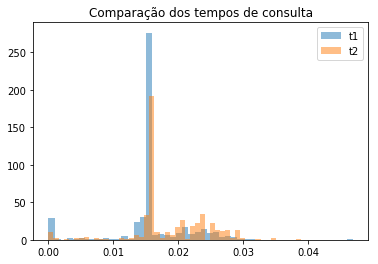

In [15]:
t1 = crono(cmd1, conn)
t2 = crono(cmd2, conn)

cmp(t1, t2)
hist(t1, t2)

### Consulta 2

Método 1:

In [8]:
cmd1 = """
select inventory_parts.inventory_id as inventario, parts.part_num as peça, colors.name as cor
    from parts join inventory_parts on inventory_parts.part_num = parts.part_num
    join colors on inventory_parts.color_id = colors.id
    where colors.name <> 'Unknown'
    order by inventory_parts.inventory_id 
"""
df1 = pd.read_sql_query(cmd1, conn)
df1.head(10)

,inventario,peça,cor
0,1,paddle,Black
1,1,48395,Light Gray
2,1,mcsport6,Orange
3,1,48379c01,Dark Bluish Gray
4,3,92258,Black
5,3,30176,Green
6,3,3020,White
7,3,3022,White
8,3,3023,White
9,3,3039,White


Método 2:

In [9]:
cmd2 = """
select inventory_parts.inventory_id as inventario, parts.part_num as peça, colors.name as cor
    from parts join inventory_parts on inventory_parts.part_num = parts.part_num
    join colors on inventory_parts.color_id = colors.id
    where colors.id in (select colors.id from colors where colors.name <> 'Unknown')
    order by inventory_parts.inventory_id 
"""
df1 = pd.read_sql_query(cmd2, conn)
df1.head(10)

,inventario,peça,cor
0,1,paddle,Black
1,1,48395,Light Gray
2,1,mcsport6,Orange
3,1,48379c01,Dark Bluish Gray
4,3,92258,Black
5,3,30176,Green
6,3,3020,White
7,3,3022,White
8,3,3023,White
9,3,3039,White


Comparação:


t2 foi, em média, 1.43% mais rápido do que t1


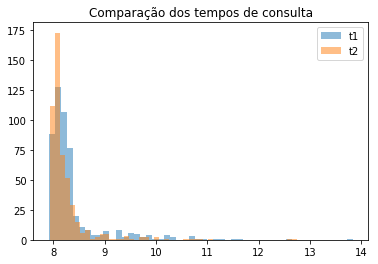

In [11]:
t1 = crono(cmd1, conn)
t2 = crono(cmd2, conn)

cmp(t1, t2)
hist(t1, t2)

### Consulta 3

Método 1:

In [12]:
cmd1 = """
select sets.name as conjunto, count(colors.name) as cores
    from inventory_parts join colors on inventory_parts.color_id = colors.id
    join inventories on inventory_parts.inventory_id = inventories.id
    join inventory_sets on inventories.id = inventory_sets.inventory_id
    join sets on inventory_sets.set_num = sets.set_num
    where colors.name <> 'Unknown'
    group by sets.set_num
    order by cores desc
"""
df1 = pd.read_sql_query(cmd1, conn)
df1.head(10)

,conjunto,cores
0,{Town Vehicles},22
1,Dacta Buildings,22
2,Set K1062 Activity Booklet,22
3,Lego Road Safety Kit Poster,22
4,Hockey Game Set,12
5,NHL Action Set with Stickers,12
6,Technic Control Center,8
7,LEGO Interface,8
8,Interface Card/Cable for Apple IIe and IIGS,8
9,Transformer and Speed Regulator,6


Método 2:

In [13]:
cmd2 = """
select sets.name as conjunto, count(colors.name) as cores
    from inventory_parts join colors on inventory_parts.color_id = colors.id
    join inventories on inventory_parts.inventory_id = inventories.id
    join inventory_sets on inventories.id = inventory_sets.inventory_id
    join sets on inventory_sets.set_num = sets.set_num
    where colors.id in (select id from colors where name <> 'Unknown')
    group by sets.set_num
    order by cores desc
"""
df1 = pd.read_sql_query(cmd2, conn)
df1.head(12)

,conjunto,cores
0,{Town Vehicles},22
1,Dacta Buildings,22
2,Set K1062 Activity Booklet,22
3,Lego Road Safety Kit Poster,22
4,Hockey Game Set,12
5,NHL Action Set with Stickers,12
6,Technic Control Center,8
7,LEGO Interface,8
8,Interface Card/Cable for Apple IIe and IIGS,8
9,Transformer and Speed Regulator,6


Comparação:


t2 foi, em média, 8.6% mais rápido do que t1


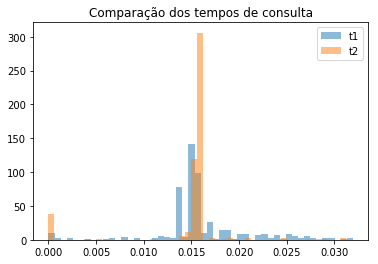

In [14]:
t1 = crono(cmd1, conn)
t2 = crono(cmd2, conn)

cmp(t1, t2)
hist(t1, t2)